# Medical Insurance Cost Project

In [60]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Lasso, Ridge

In [61]:
url = 'https://breathecode.herokuapp.com/asset/internal-link?id=416&path=medical_insurance_cost.csv'
df_raw = pd.read_csv(url)
df_raw.sample(10)

,age,sex,bmi,children,smoker,region,charges
1186,20,male,35.625,3,yes,northwest,37465.34375
424,48,male,30.200,2,no,southwest,8968.33000
1168,32,male,35.200,2,no,southwest,4670.64000
404,31,male,20.400,0,no,southwest,3260.19900
1222,50,male,25.300,0,no,southeast,8442.66700
482,18,female,31.350,0,no,southeast,1622.18850
1263,43,female,29.900,1,no,southwest,7337.74800
1052,49,male,29.830,1,no,northeast,9288.02670
1199,31,female,25.800,2,no,southwest,4934.70500
1119,30,female,19.950,3,no,northwest,5693.43050


In [62]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [63]:
df_baking = df_raw.copy()

In [64]:
cat_cols = ['sex', 'smoker', 'region']

df_baking[cat_cols] = df_baking[cat_cols].astype('category')
df_baking['charges'] = np.log(df_baking['charges'])

In [65]:
df = df_baking.copy()

## Numerical analysis

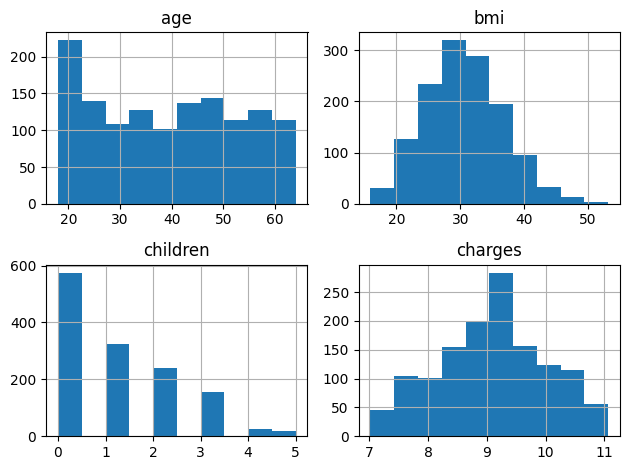

In [66]:
df.hist()
plt.tight_layout()
plt.show()

In [67]:
df.describe(include='number').T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.000000,27.000000,39.000000,51.000000,64.000000
bmi,1338.0,30.663397,6.098187,15.960000,26.296250,30.400000,34.693750,53.130000
children,1338.0,1.094918,1.205493,0.000000,0.000000,1.000000,2.000000,5.000000
charges,1338.0,9.098659,0.919527,7.022756,8.463853,9.146552,9.719558,11.063045


- People around 20-23 years old are overrepresented in the data set. The age distribution is relatively flat without taking into account young people's peak.
- The bmi distribution assimilates a normal distribution with a slight positive skewness. 
- Most people in the data set do not have any children. The range in number of children in the data set is from none up to 5. 
- The charges distribution is positively skewed. They range from $1100 up to $63770, with a mean of $9382

## Categorical analysis

In [68]:
display(df['sex'].value_counts())
display(df['region'].value_counts())
display(df['smoker'].value_counts())

sex
male      676
female    662
Name: count, dtype: int64

region
southeast    364
northwest    325
southwest    325
northeast    324
Name: count, dtype: int64

smoker
no     1064
yes     274
Name: count, dtype: int64

/tmp/ipykernel_2813/1269112220.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)


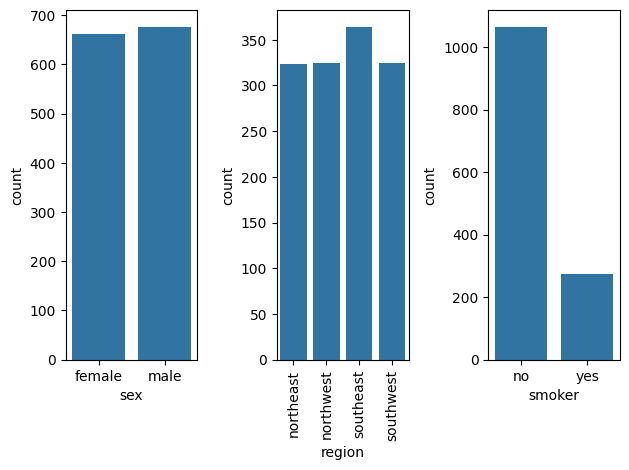

In [69]:
fig, axes = plt.subplots(1, 3)

sns.countplot(df, x='sex', ax=axes[0])
sns.countplot(df, x='region', ax=axes[1])
sns.countplot(df, x='smoker', ax=axes[2])

axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
plt.tight_layout()
plt.show()

- The data set has slightly more males than females. 
- Regions are almost equally represented, except for southeast which has slightly more counts than the other regions.
- Non-smokers are overrepresented with 1064 counts, while there are 274 smokers

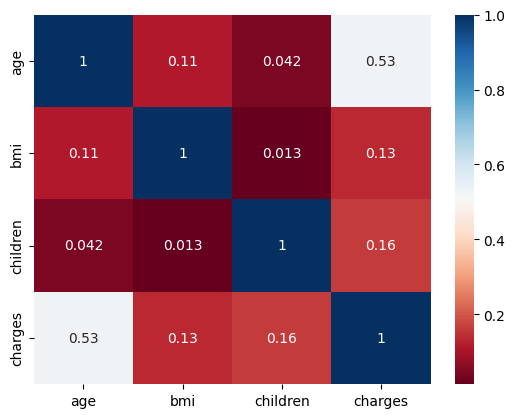

In [70]:
corr = df.select_dtypes(include='number').corr()

sns.heatmap(data=corr, cmap='RdBu', annot=True)
plt.show()

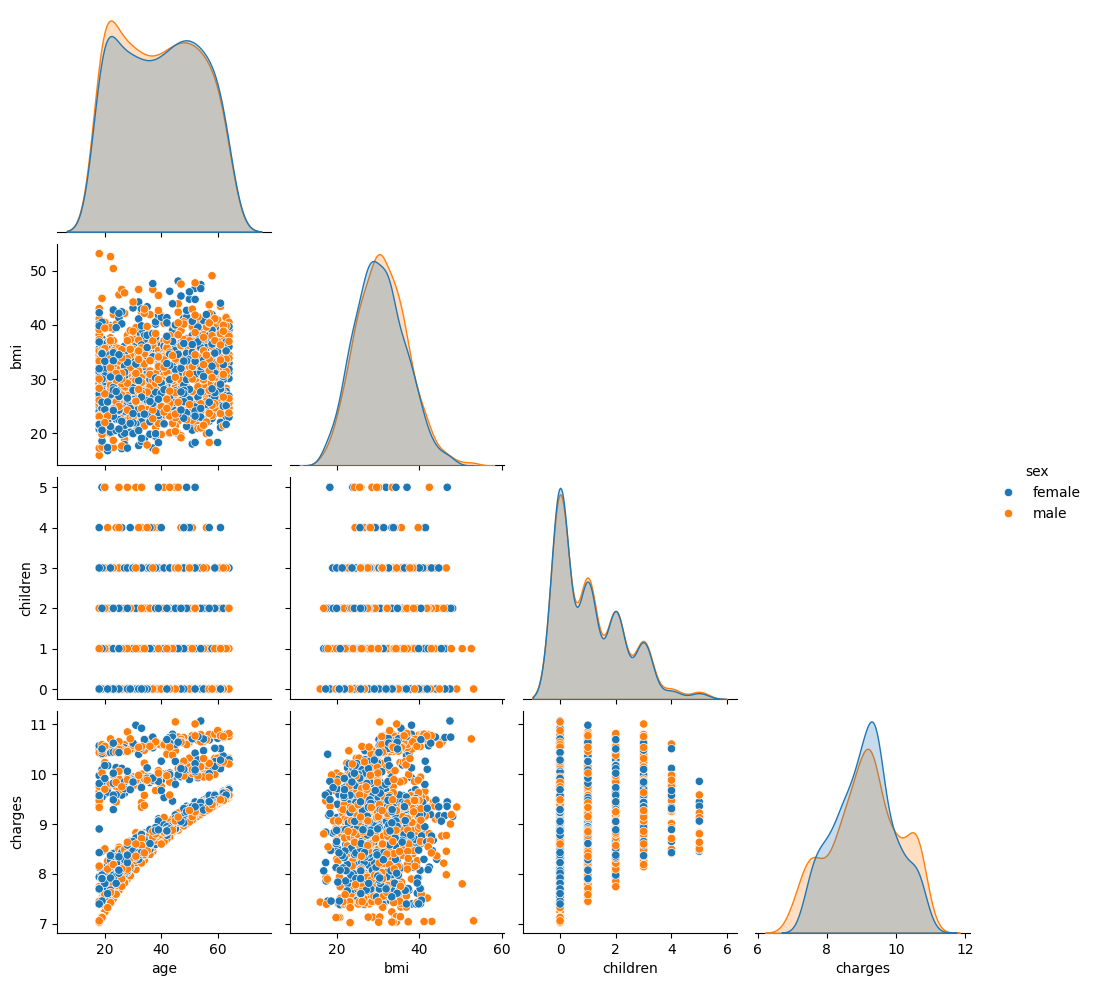

In [71]:
sns.pairplot(df, corner=True, hue='sex')
plt.show()

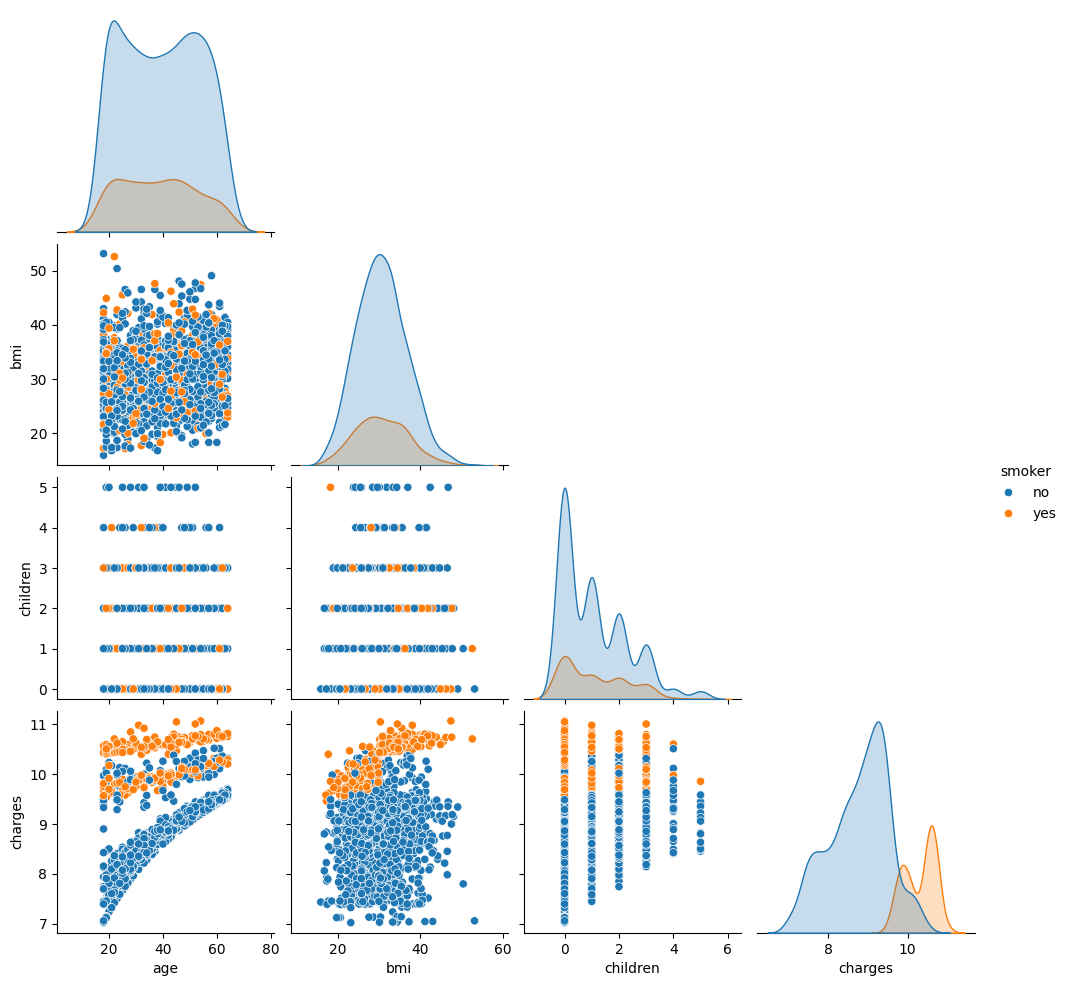

In [72]:
sns.pairplot(df, corner=True, hue='smoker')
plt.show()

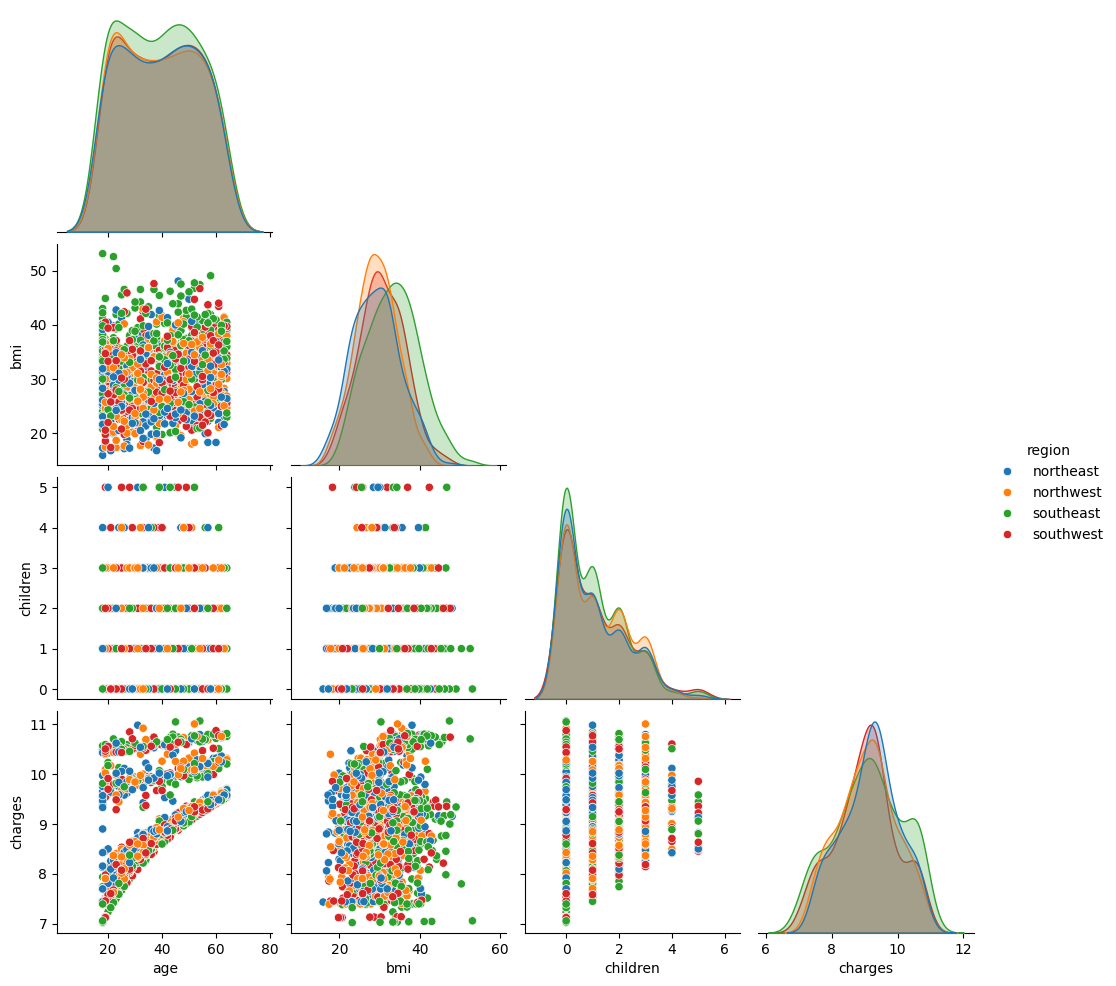

In [73]:
sns.pairplot(df, corner=True, hue='region')
plt.show()

## Linear Regression

In [74]:
# Split data
X = df.drop(columns='charges')
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=2025)

In [75]:
num_cols = X_train.select_dtypes('number').columns
cat_cols = X_train.select_dtypes('category').columns

num_proc = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])
cat_proc = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first'))
])
processor = ColumnTransformer(transformers=[
    ('num', num_proc, num_cols),
    ('cat', cat_proc, cat_cols)
])
reg_lr = Pipeline(steps=[
    ('proc', processor),
    ('lr', LinearRegression())
])

In [76]:
reg_lr.fit(X_train, y_train)
y_hat = reg_lr.predict(X_test)

In [77]:
display(f'MSE (Mean Squared Error): {mean_squared_error(y_test, y_hat)}')
display(f'MAE (Mean Absolute Error): {mean_absolute_error(y_test, y_hat)}')
display(f'MAE (Root mean Absolute Error): {np.sqrt(mean_squared_error(y_test, y_hat))}')
display(f"Coefficient of determination: {r2_score(y_test, y_hat)}")

'MSE (Mean Squared Error): 0.15110080565237544'

'MAE (Mean Absolute Error): 0.24426678627676662'

'MAE (Root mean Absolute Error): 0.38871687081007356'

'Coefficient of determination: 0.815694191508167'

In [78]:
display(f"Intercept (a): {reg_lr['lr'].intercept_}")
display(f"Coefficients (b): {reg_lr['lr'].coef_}")

'Intercept (a): 7.870141040808692'

'Coefficients (b): [ 1.57868923  0.48908798  0.51876174 -0.07982688  1.55434655 -0.04850224\n -0.15414261 -0.11162294]'

### Formulas:

$$y=β_0+β_1*age+β_2*bmi+β_3*children+β_4*malesex+β_5*smokeryes+β_6*regionNW+β_7regionSE+β_8*regionSW$$

$$y=-2141+12017.6*age+12671.9*bmi+2771.3*children-198.4*malesex+23859.7*smokeryes-148.4*regionNW-993.7*regionSE-705.4*regionSW$$

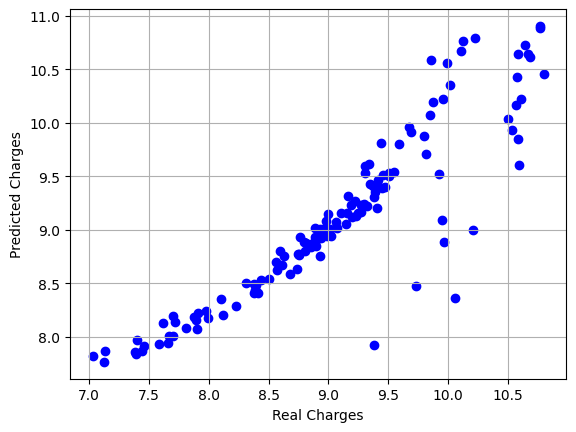

In [79]:
plt.scatter(x=y_test, y=y_hat, color='b')
plt.grid(True)
plt.xlabel('Real Charges')
plt.ylabel('Predicted Charges')
plt.show()

In [80]:
reg_ridge = Pipeline(steps=[
    ('proc',processor),
    ('reg_ridge',Ridge(alpha=100))
])

reg_ridge.fit(X_train, y_train)
y_hat = reg_ridge.predict(X_test)

In [81]:
display(f'MSE(Mean squeare error): {mean_squared_error(y_test, y_hat)}') #Prueba, prediccion
display(f'MAE(Mean absolute error): {mean_absolute_error(y_test, y_hat)}')
display(f'RMSE(Root mean squeare error): {np.sqrt(mean_squared_error(y_test, y_hat))}')
display(f"Coefficient of determination: {r2_score(y_test, y_hat)}")

'MSE(Mean squeare error): 0.27728735967337115'

'MAE(Mean absolute error): 0.3777214773247587'

'RMSE(Root mean squeare error): 0.5265808196975761'

'Coefficient of determination: 0.6617776405061614'

## Conclusions:

The linear regression model correctly explains 78% of the variance, with an average error of $3k to $5k. This suggests a strong fit, but there is still room for improvement. 

The ridge regression model explains about 68% of the variance. This is a moderately strong fit, but has a significant error level of $4k up to $6k. This model struggles to predict exact charges.
